In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r3/title_r3_5k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 4864
encoding protein...
unique target sequence: 1037
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 52.5965. Total time 0.00027 hours
Validation at Epoch 1 with loss:4.91457, MSE: 4.82246 , Pearson Correlation: 0.15548 with p-value: 4.84E-04 , Concordance Index: 0.54780
Training at Epoch 2 iteration 0 with loss 5.15021. Total time 0.00333 hours
Validation at Epoch 2 with loss:2.28551, MSE: 2.27085 , Pearson Correlation: 0.18477 with p-value: 3.22E-05 , Concordance Index: 0.55727
Training at Epoch 3 iteration 0 with loss 2.39108. Total time 0.00638 hours
Validation at Epoch 3 with loss:2.31621, MSE: 2.26867 , Pearson Correlation: 0.21875 with p-value: 7.84E-07 , Concordance Index: 0.56929
Training at Epoch 4 iteration 0 with loss 2.19459. Total time 0.00944 hours
Validation at Epoch 4 with loss:2.19635, MSE: 2.35046 , Pearson Correlation: 0.25495 with p-value: 7.36E-09 , Concordance Index: 0.58228
Training at Epoch 5 iteration 0 with loss 2.30166. Total time 0.0125 hours
Validat

Training at Epoch 39 iteration 0 with loss 1.93341. Total time 0.20111 hours
Validation at Epoch 39 with loss:1.77724, MSE: 1.79667 , Pearson Correlation: 0.54357 with p-value: 8.75E-40 , Concordance Index: 0.67700
Training at Epoch 40 iteration 0 with loss 0.78494. Total time 0.20833 hours
Validation at Epoch 40 with loss:1.79177, MSE: 1.76669 , Pearson Correlation: 0.53001 with p-value: 1.46E-37 , Concordance Index: 0.66895
Training at Epoch 41 iteration 0 with loss 0.57447. Total time 0.21527 hours
Validation at Epoch 41 with loss:1.70402, MSE: 1.65333 , Pearson Correlation: 0.53741 with p-value: 9.22E-39 , Concordance Index: 0.67218
Training at Epoch 42 iteration 0 with loss 0.60347. Total time 0.22305 hours
Validation at Epoch 42 with loss:1.88817, MSE: 1.84589 , Pearson Correlation: 0.52880 with p-value: 2.28E-37 , Concordance Index: 0.66749
Training at Epoch 43 iteration 0 with loss 0.72368. Total time 0.23055 hours
Validation at Epoch 43 with loss:1.77501, MSE: 1.82207 , Pearso

Validation at Epoch 77 with loss:1.87301, MSE: 2.03191 , Pearson Correlation: 0.48605 with p-value: 5.24E-31 , Concordance Index: 0.65246
Training at Epoch 78 iteration 0 with loss 0.14473. Total time 0.46027 hours
Validation at Epoch 78 with loss:1.86420, MSE: 2.06388 , Pearson Correlation: 0.48783 with p-value: 2.96E-31 , Concordance Index: 0.65514
Training at Epoch 79 iteration 0 with loss 0.14011. Total time 0.46666 hours
Validation at Epoch 79 with loss:1.72559, MSE: 1.97246 , Pearson Correlation: 0.48349 with p-value: 1.18E-30 , Concordance Index: 0.65180
Training at Epoch 80 iteration 0 with loss 0.14967. Total time 0.47305 hours
Validation at Epoch 80 with loss:1.95549, MSE: 1.96497 , Pearson Correlation: 0.48936 with p-value: 1.81E-31 , Concordance Index: 0.65387
Training at Epoch 81 iteration 0 with loss 0.18390. Total time 0.47888 hours
Validation at Epoch 81 with loss:1.83387, MSE: 2.00349 , Pearson Correlation: 0.48939 with p-value: 1.79E-31 , Concordance Index: 0.65466
Tr

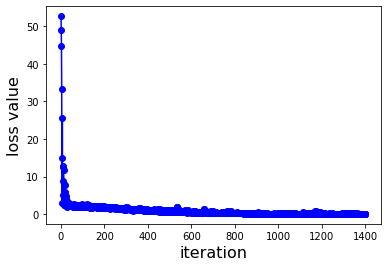

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r3/model_r3_5k_100epochs')